**Global Optimisation**

Sometimes we need to overcome barriers and find multiple stable minima in a system. To do this, we use global optimisation.

Here is a simple example for Cu2 on a Pt surface, again using the `EMT` calculator. First we load relevant modules for our work:

In [1]:
from ase import Atoms, Atom
from ase.build import fcc110

With these, lets now build a relevant Pt surface and add some Cu adsorbates:

In [2]:
# Make the Pt 110 slab.
atoms = fcc110('Pt', (2, 2, 2), vacuum=7.)

# Add the Cu2 adsorbate.
adsorbate = Atoms([Atom('Cu', atoms[7].position + (0., 0., 2.5)),
                   Atom('Cu', atoms[7].position + (0., 0., 5.0))])
atoms.extend(adsorbate)

Because we have several layers of Pt, and we just want these to stay still during the calculation (instead of moving!) we will apply some constraints so the lower layers can't move:

In [3]:
from ase.constraints import FixAtoms, Hookean

# Constrain the surface to be fixed and a Hookean constraint between
# the adsorbate atoms.
constraints = [FixAtoms(indices=[atom.index for atom in atoms if
                                 atom.symbol=='Pt']),
               Hookean(a1=8, a2=9, rt=2.6, k=15.),
               Hookean(a1=8, a2=(0., 0., 1., -15.), k=15.),]
atoms.set_constraint(constraints)

Now we have a geometry model, lets actually do some energy calculations. We'll import the `EMT` calculator again:

In [4]:
from ase.calculators.emt import EMT

# Set the calculator.
calc = EMT()
atoms.set_calculator(calc)

And then run an approach for global optimisation call "Basin Hopping":

In [5]:
from ase.optimize.minimahopping import MinimaHopping
# Instantiate and run the minima hopping algorithm.
hop = MinimaHopping(atoms,
                    Ediff0=2.5,
                    T0=4000.)
hop(totalsteps=10)

/Users/andrewlogsdail/Library/Python/3.8/lib/python/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array(obj)


Finally, once this has run we can look at the analysis of the results something like:

/Users/andrewlogsdail/Library/Python/3.8/lib/python/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array(obj)
/Users/andrewlogsdail/Library/Python/3.8/lib/python/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array(obj)
/Users/andrewlogsdail/Library/Python/3.8/lib/python/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes)

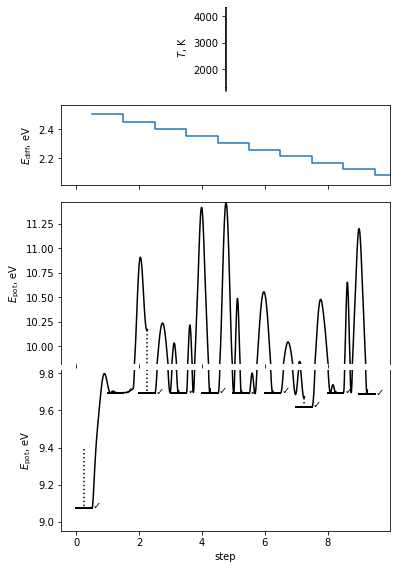

In [6]:
from ase.optimize.minimahopping import MHPlot

mhplot = MHPlot()
mhplot.save_figure('summary.png')

from matplotlib import image, pyplot
# Make zoomable
#%matplotlib notebook
# Can't find a more efficient way to do this, unfortunately
imgplot = pyplot.imshow(image.imread('summary.png'))
pyplot.show()